In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')


In [16]:
y = df['logS']
X = df.drop('logS', axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_lr_train_pred = lr.predict(X_train)

y_lr_test_pred = lr.predict(X_test)

print(y_lr_train_pred, y_lr_test_pred)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [36]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


In [ ]:
##Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [38]:
y_rf_train_pred = rf.predict(X_train)

y_rf_test_pred = rf.predict(X_test)

In [40]:

from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)

rf_train_r2 = r2_score(y_train, y_rf_train_pred)

In [41]:
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)

rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [43]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [ ]:
#Model Comparison

In [45]:
fs_models = pd.concat([lr_results, rf_results], axis = 0)

fs_models.reset_index(drop = True)

fs_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [ ]:
#Data Visualization

AttributeError: module 'numpy' has no attribute 'polyld'

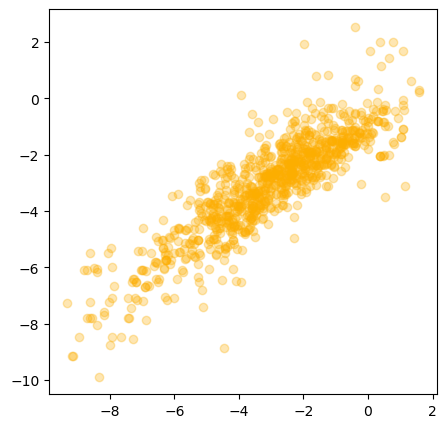

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

plt.figure(figsize= (5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c= '#FCAE00', alpha= 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.polyld(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental logS')